In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_csv('dl3Churn_Modelling.csv')
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId', 'Surname'], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
"""We can't keep categorical_data, we have to make it boolean type."""
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [12]:
"""While working with neural networks, properly scale the data as unscaled data leads to slow and incorrect convergence."""
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Exited'])
y=df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
X_train.shape

(8000, 11)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()
"""Input, Hidden, Output, all 1 layers
Dense Attribute create dense layers
"""
model.add(Dense(3,activation='sigmoid', input_dim=11))#creating 1st layer, so input dimension are 11, meaning input from previous layers and 3 here means it will have 3 neurons, thereby 3 outputs, activation function is sigmoid
model.add(Dense(1, activation='sigmoid')) #Creating Output Layer, with 1 output as 1 neuron is present

C:\Users\q\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
"""While Compiling model, optimizer, loss function and other necessary details is to be provided"""
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy']) #binarycrossentropy or logloss as lossfunction, as we have to predict Exited 0 or 1, and optimizer Adam generally performs well

In [20]:
#Training neural network, tell how much time it should be trained on same data.
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2) #Validation split means in training also it splits 20% of training data and trains on 80% and tests on remaining 20%, and instantly gives accuracy_score

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7956 - loss: 0.5278 - val_accuracy: 0.7975 - val_loss: 0.4940
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7985 - loss: 0.4863 - val_accuracy: 0.7975 - val_loss: 0.4744
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7895 - loss: 0.4783 - val_accuracy: 0.7975 - val_loss: 0.4635
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7995 - loss: 0.4524 - val_accuracy: 0.7975 - val_loss: 0.4557
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4500 - val_accuracy: 0.7975 - val_loss: 0.4498
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7889 - loss: 0.4535 - val_accuracy: 0.7975 - val_loss: 0.4451
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8020 - loss: 0.4295 - val_accuracy: 0.7975 - val_loss: 0.4414
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7944 - loss: 0.4377 - val_accu

In [21]:
#To get weights and biases of input layer, first array of weights and second of biases
#model.layers[0].get_weights()
model.layers[1].get_weights()

[array([[-2.4440603],
        [-1.6711473],
        [-1.8223891]], dtype=float32),
 array([1.6787565], dtype=float32)]

In [22]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [23]:
"""The output is between 0 and 1 due to sigmoid, so classify them based on some criteria, you may use ROC(Receiver Operating Characteristic and AUC(Area Under the Curve) for proper analysis of threshold value"""
#Considering 0.5 as threshold value
y_pred = np.where(y_log>0.5, 1, 0) #it means where y_log[j]>0.5 , in the corresponding array output 1 and if not then 0.

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.838

In [25]:
"""General Ways to improve, accuracy_score
Increase number of epochs
Activation function of hidden layers to be kept as sigmoid
Number of nodes of layers, especially hidden layers should be increased
Number of layers should be increased
But, if accuracy_score of training data is increasing and accuracy of validation data stagnates then it is the case of overfitting.
"""

'General Ways to improve, accuracy_score\nIncrease number of epochs\nActivation function of hidden layers to be kept as sigmoid\nNumber of nodes of layers, especially hidden layers should be increased\nNumber of layers should be increased\nBut, if accuracy_score of training data is increasing and accuracy of validation data stagnates then it is the case of overfitting.\n'

In [26]:
import matplotlib.pyplot as plt
#History is a object, but history.history is a dictionary which gives us a dictionary with 4 key-value pair here, training loss, accuracy score, validation loss, validation accuracy
history.history

{'accuracy': [0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7973437309265137,
  0.7981250286102295,
  0.801562488079071,
  0.8042187690734863,
  0.8062499761581421,
  0.8089062571525574,
  0.8096874952316284,
  0.8121874928474426,
  0.8137500286102295,
  0.8153125047683716,
  0.8165624737739563,
  0.817187488079071,
  0.8178125023841858,
  0.8185937404632568,
  0.8201562762260437,
  0.8207812309265137,
  0.8218749761581421,
  0.8221874833106995,
  0.8231250047683716,
  0.8237500190734863,
  0.823437511920929,
  0.8251562714576721,
  0.8256250023841858,
  0.8254687786102295,
  0.8260937333106995,
  0.8256250023841858,
  0.8268749713897705,
  0.8262500166893005,
  0.8265625238418579,
  0.8278124928474426,
  0.8284375071525574,
  0.8278124928474426,
  0.8301562666893005,
  0.8310937285423279,
  0.8314062356948853,
  0.8314062356948853,
 

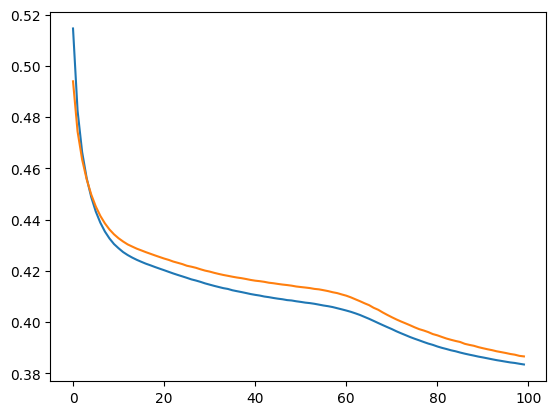

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

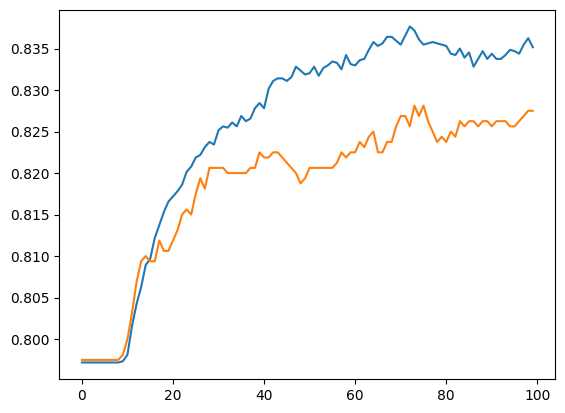

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])